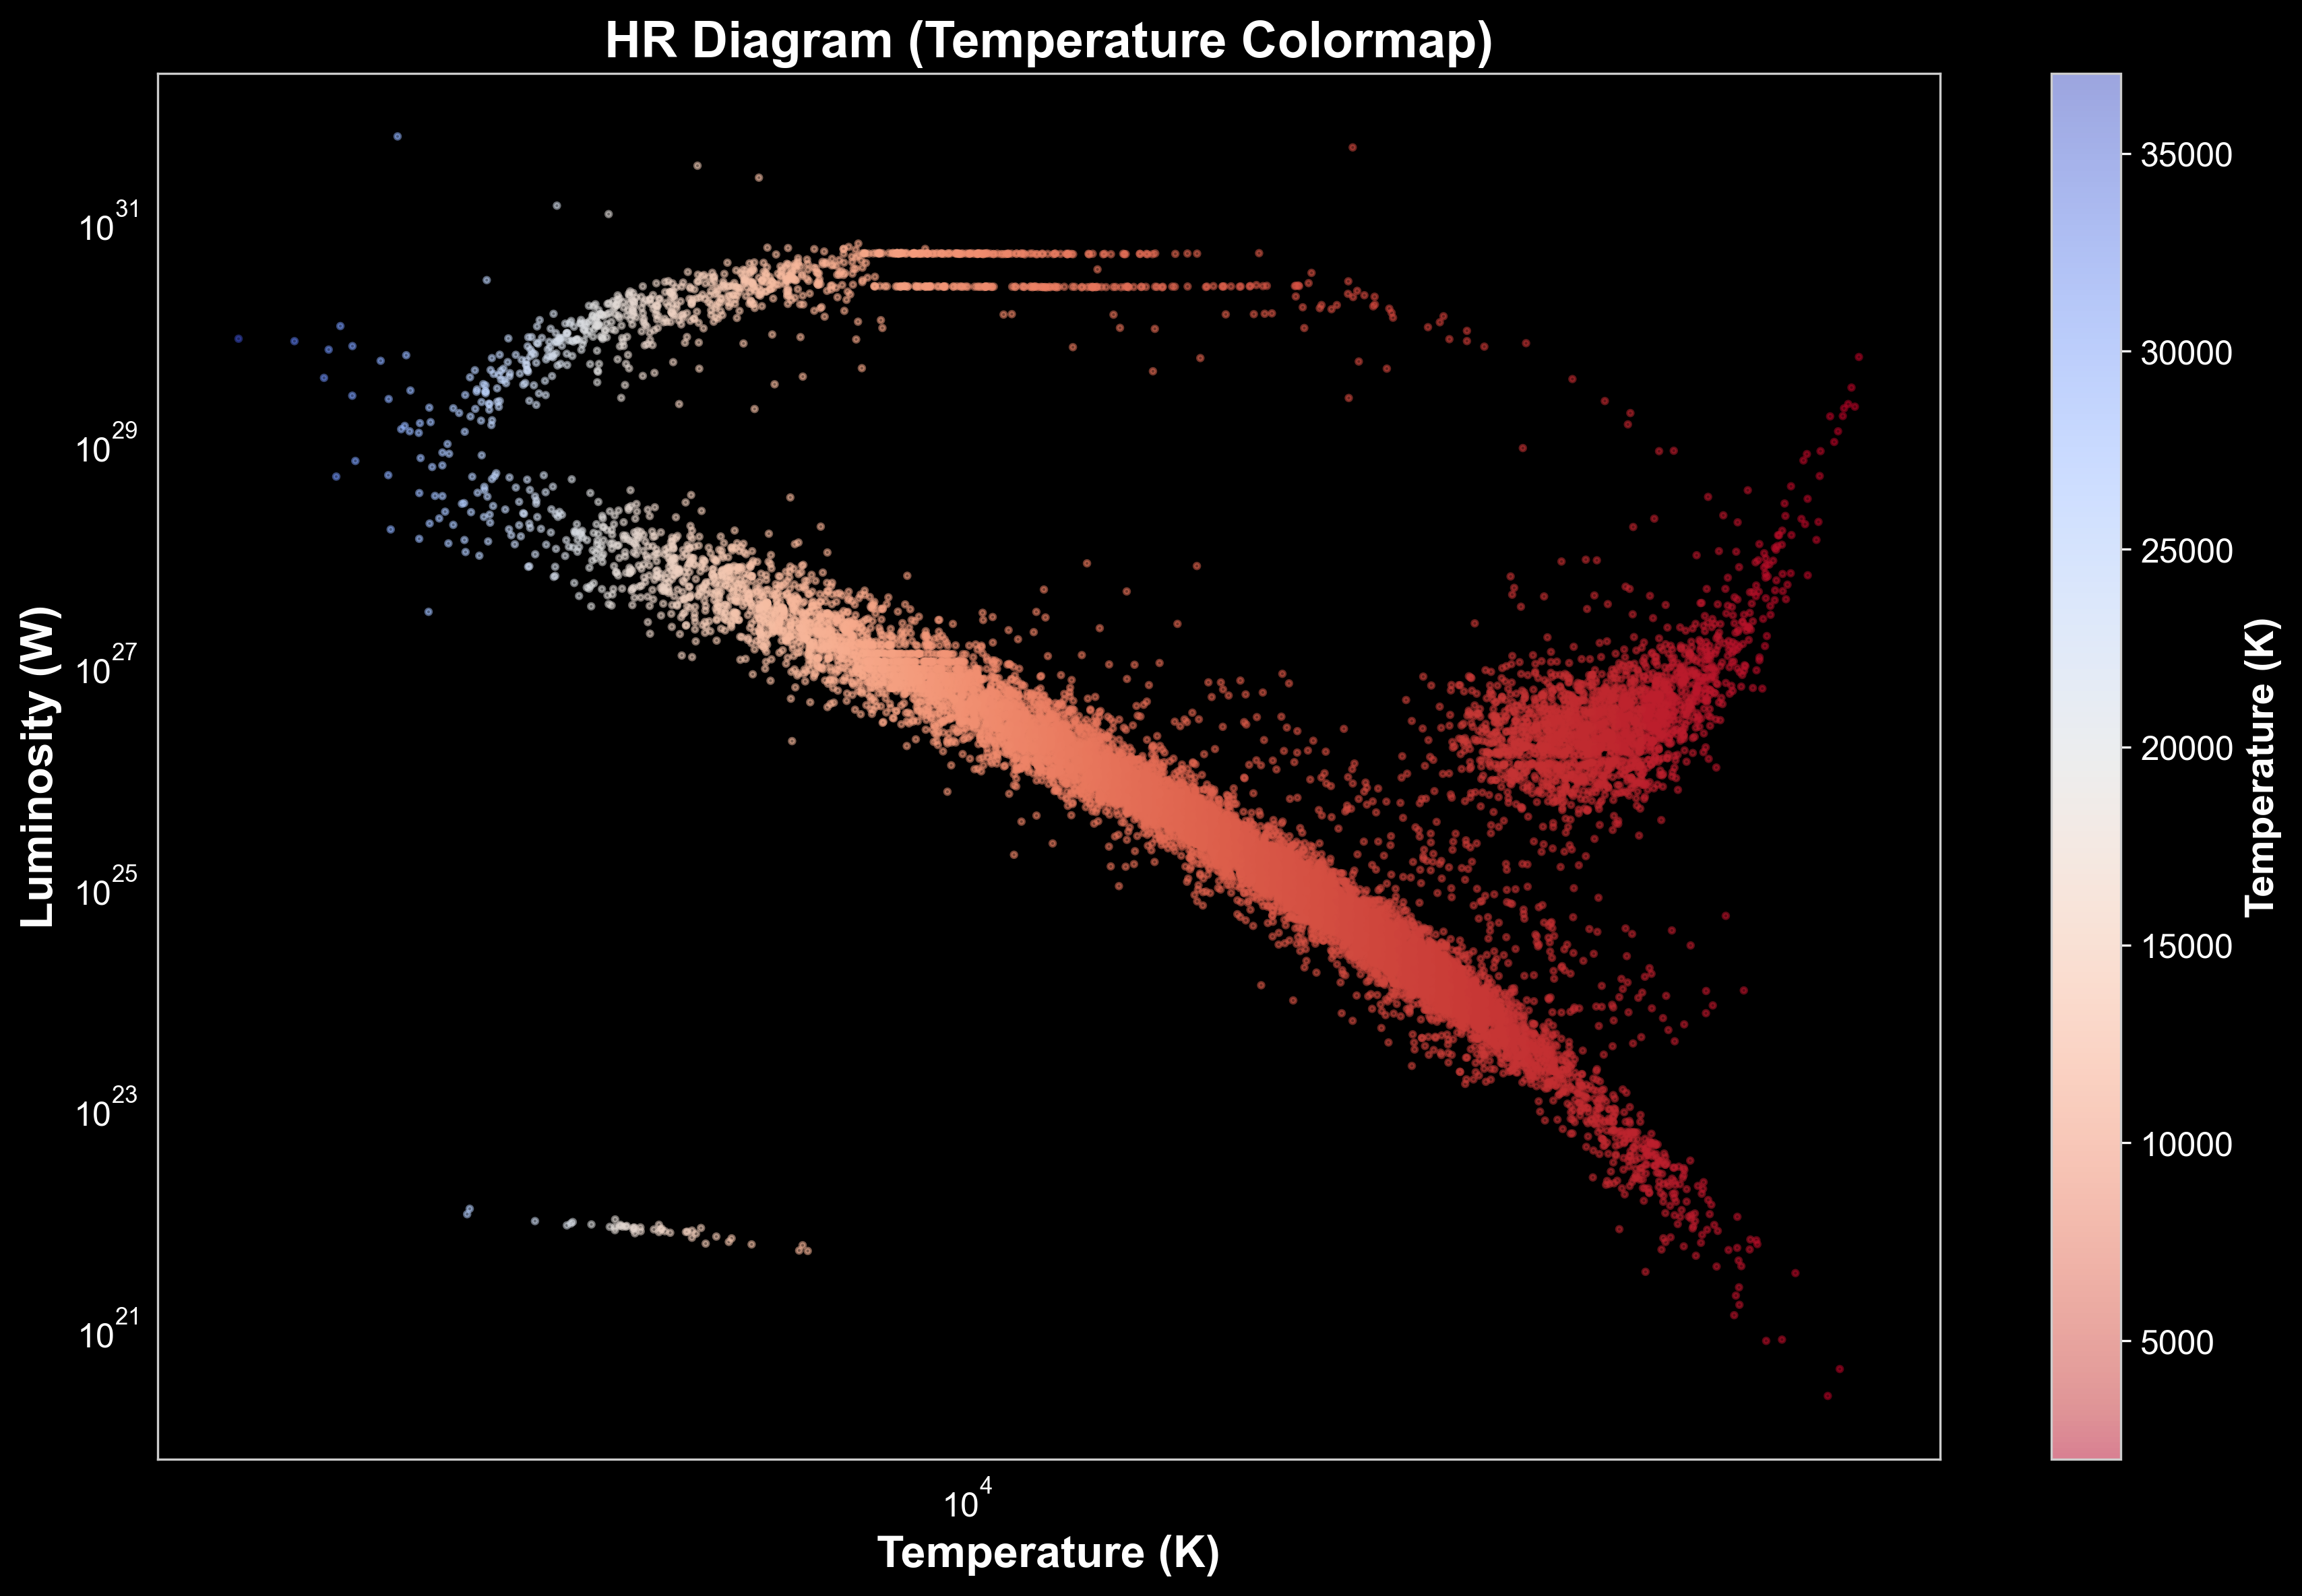

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import random
import numpy as np

# Load the data from the CSV file
star_data = pd.read_csv("/Users/kobibrown/Desktop/Distance_Ladder_Project/star_data_with_luminosity_radii_and_uncertainties.csv")

# Extract temperatures, luminosities, and radii
temperatures = star_data["Temperature"].values
luminosities = star_data["Luminosity"].values
radii = star_data["Radii"].values

# Define a custom colormap that goes from orange to blue
cmap_colors = cm.get_cmap('coolwarm_r')(np.linspace(0, 1, 256))
custom_cmap = ListedColormap(cmap_colors)

# Choose a random sample of stars
random_sample_size = 15000
random_indices = random.sample(range(len(temperatures)), random_sample_size)
sampled_temperatures = [temperatures[i] for i in random_indices]
sampled_luminosities = [luminosities[i] for i in random_indices]

# HR Diagram with temperature colormap
fig, ax = plt.subplots(figsize=(12,8), dpi=300)
sc = ax.scatter(sampled_temperatures, sampled_luminosities, s=4, c=sampled_temperatures, cmap=custom_cmap, alpha=0.5)

# Add colorbar
cbar = plt.colorbar(sc)
cbar.set_label('Temperature (K)', color='white', fontsize=14, fontweight='bold')
cbar.ax.yaxis.set_tick_params(color='white')
cbar.ax.tick_params(labelcolor='white', labelsize=12)

ax.invert_xaxis()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Temperature (K)', color='white', fontsize=16, fontweight='bold')
ax.set_ylabel('Luminosity (W)', color='white', fontsize=16, fontweight='bold')
ax.set_title('HR Diagram (Temperature Colormap)', color='white', fontsize=18, fontweight='bold')
ax.tick_params(colors='white', labelsize=12)
ax.grid(False)

# Set background color to black
ax.set_facecolor('black')
fig.set_facecolor('black')

# Save and show the plot
plt.tight_layout()
plt.savefig('hr_diagram_temperature_colormap.png', facecolor=fig.get_facecolor(), transparent=True)
plt.show()


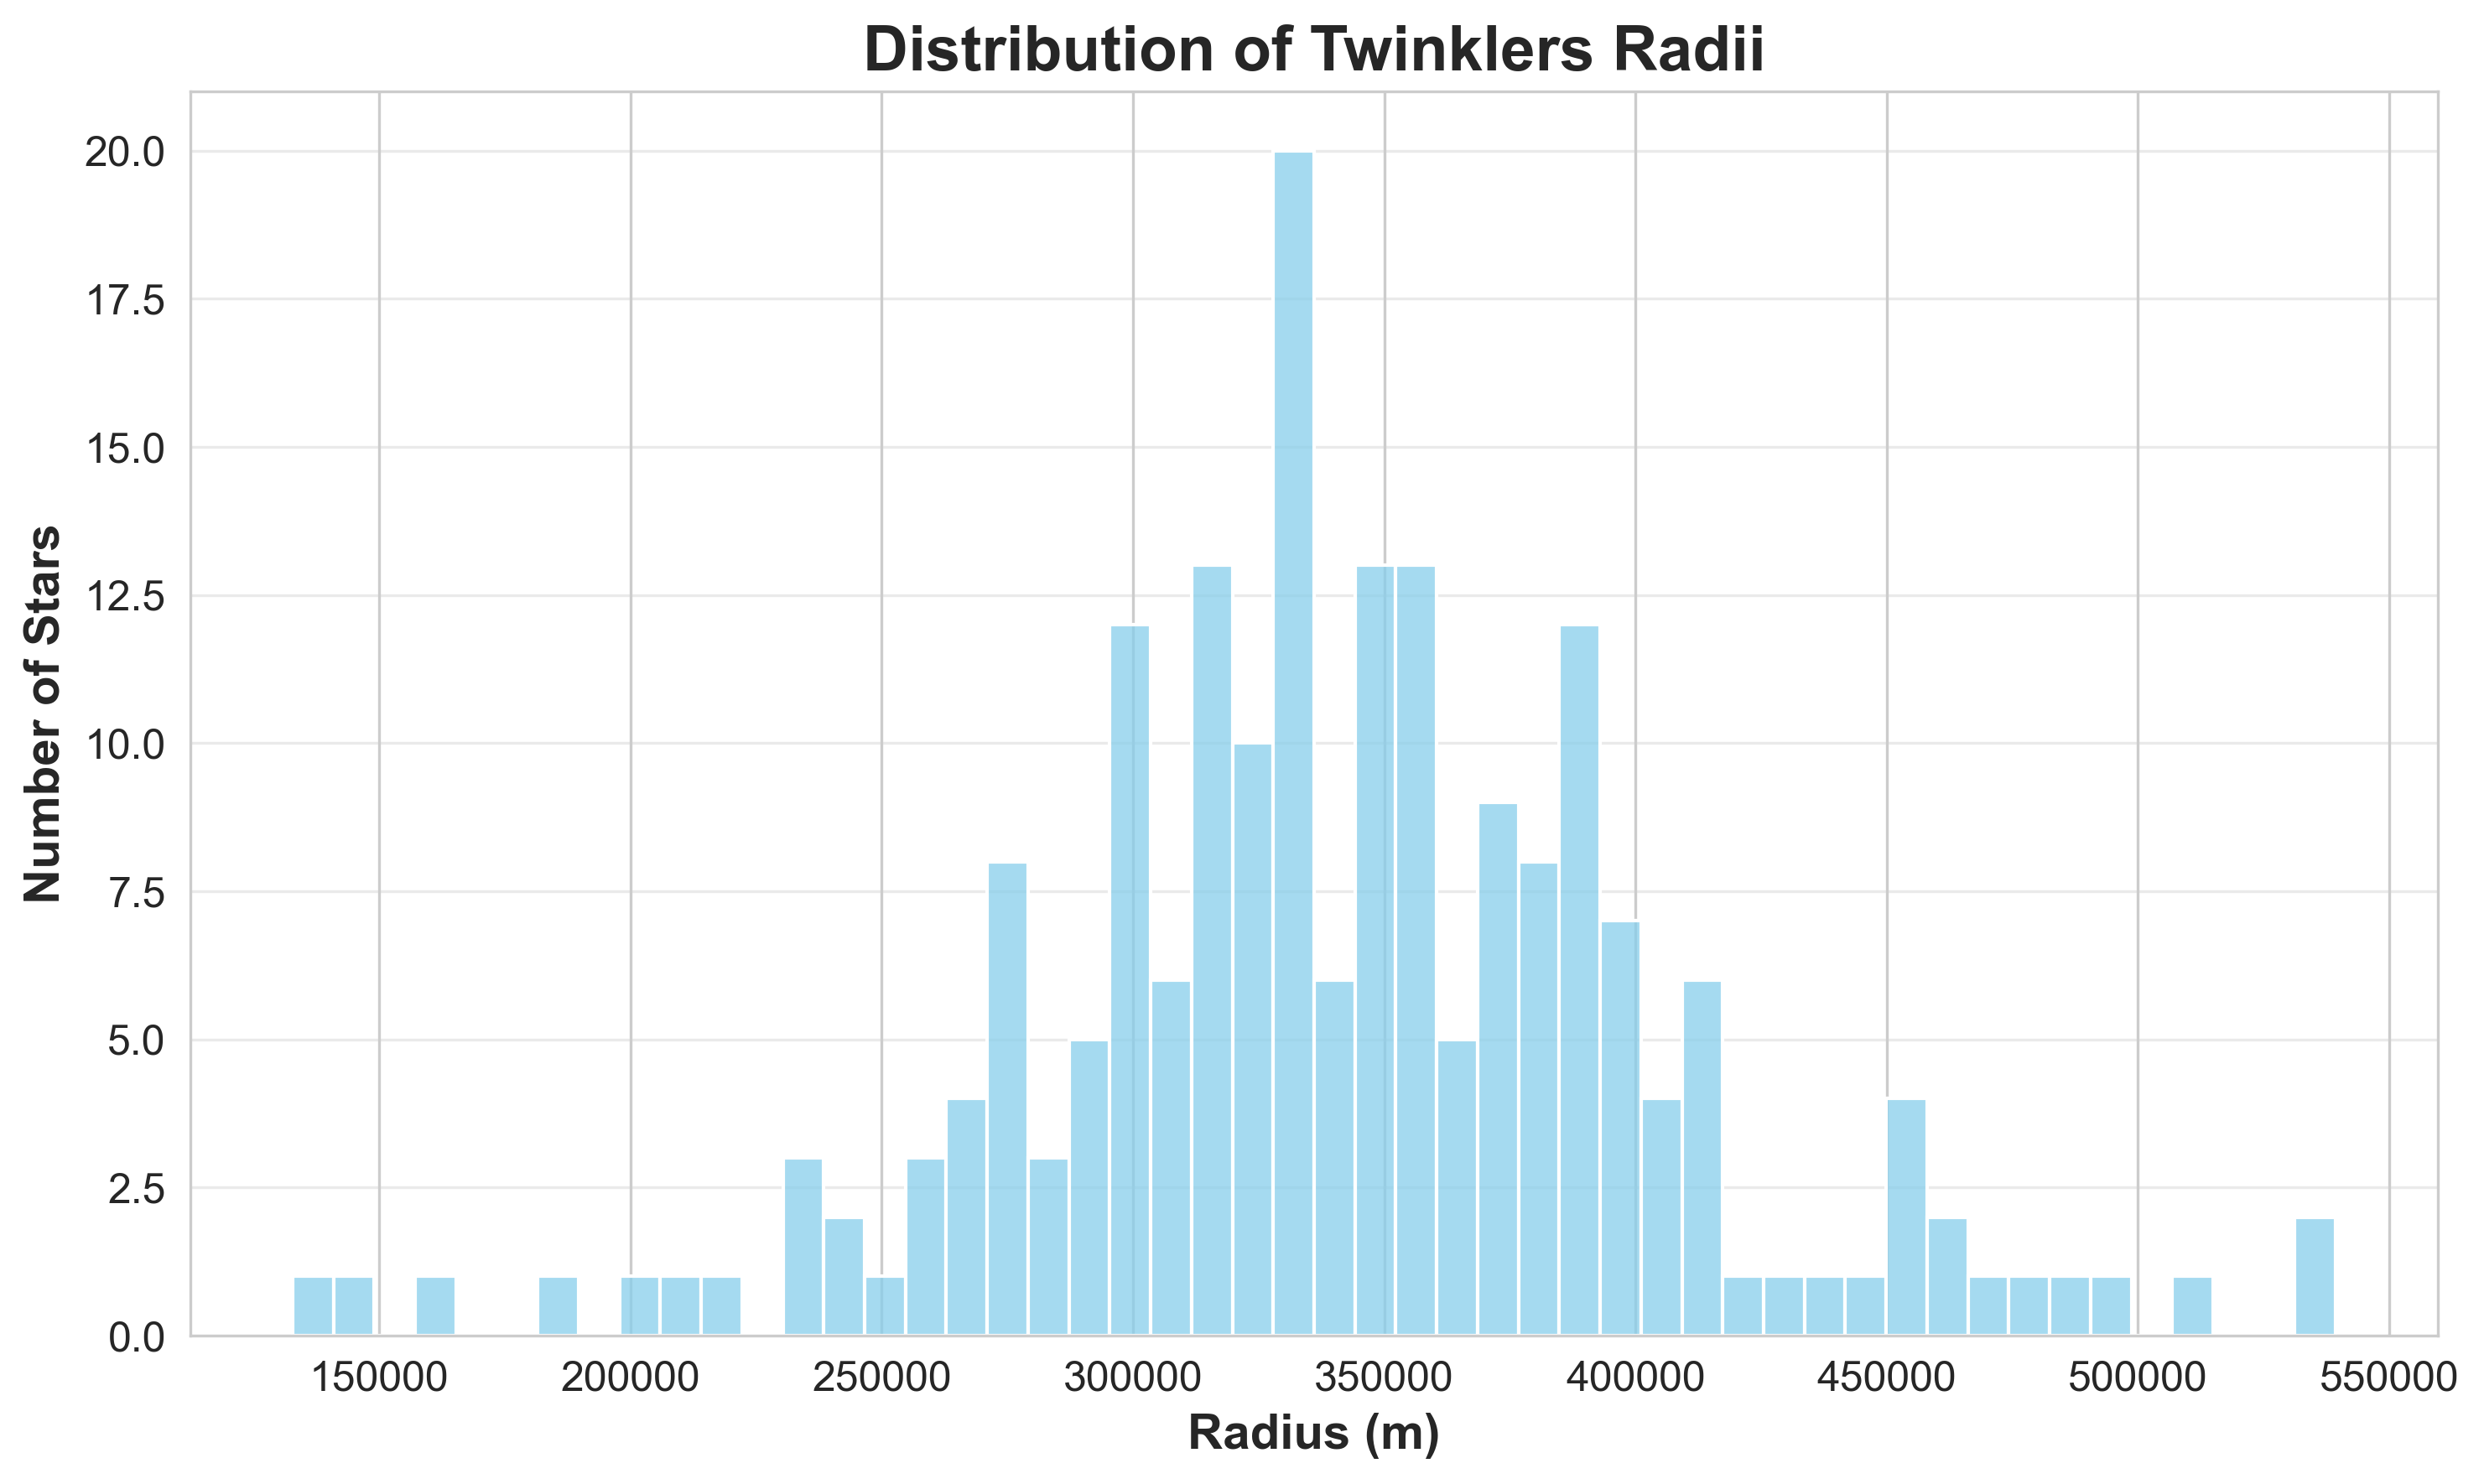

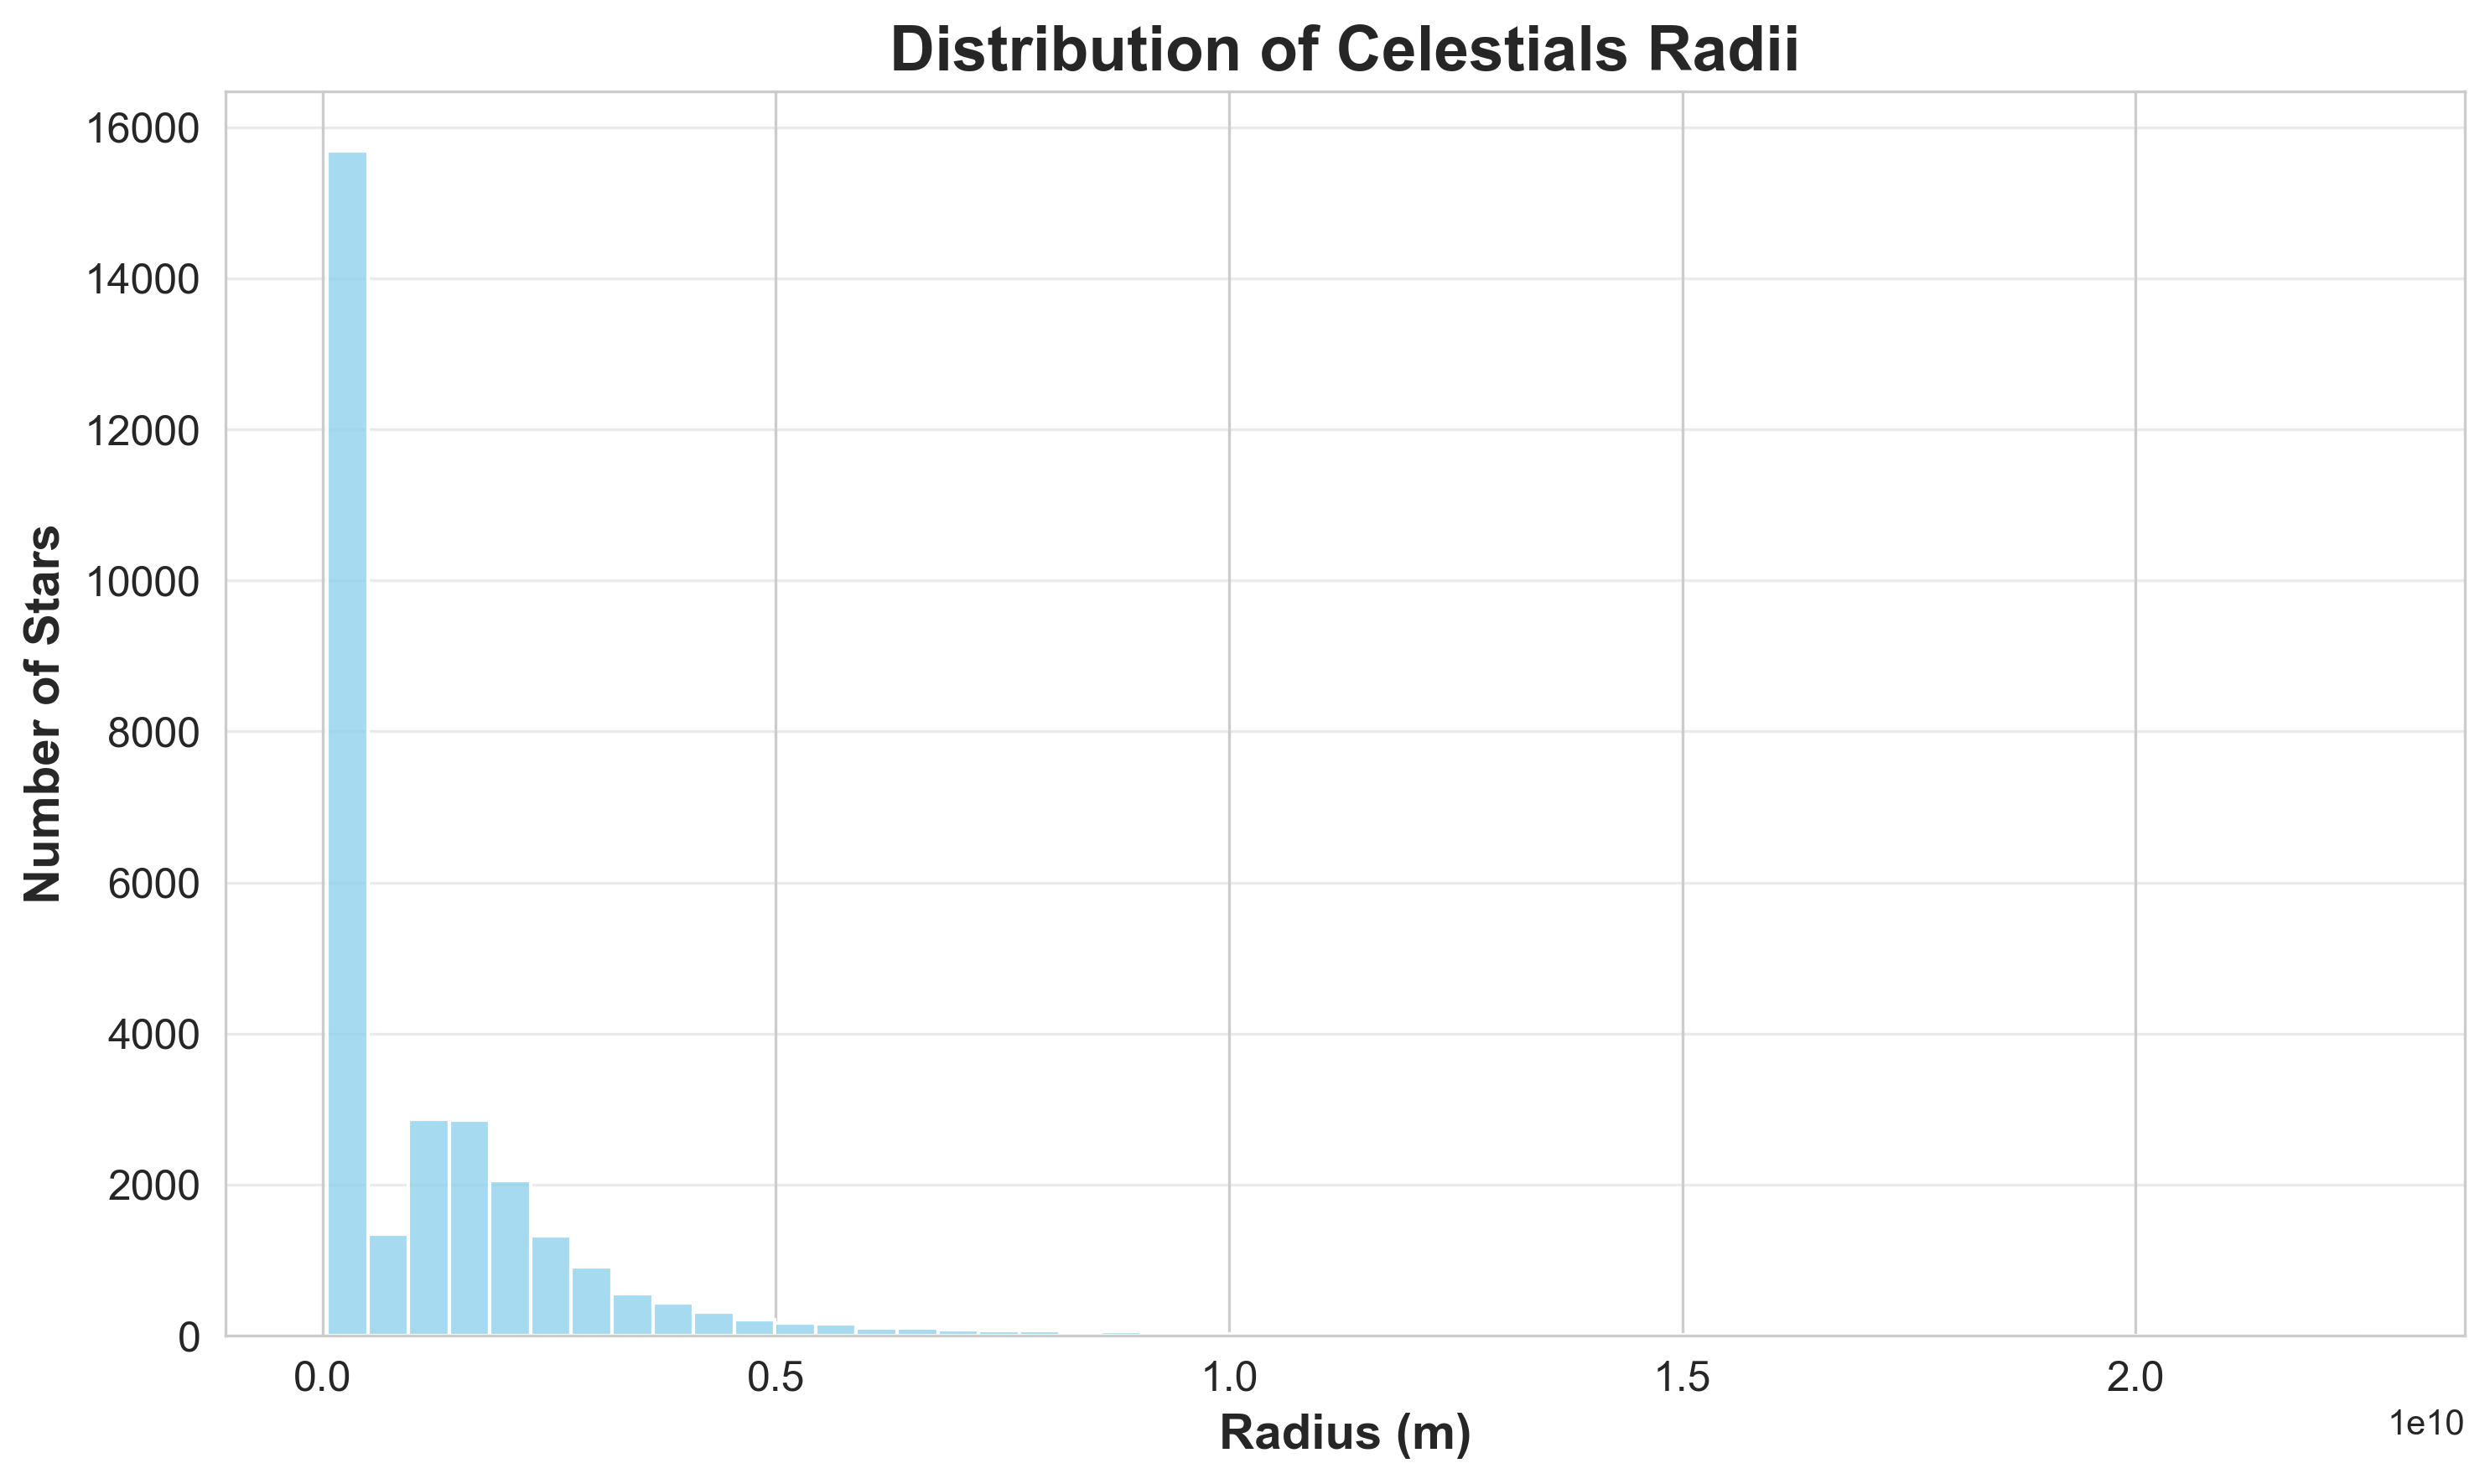

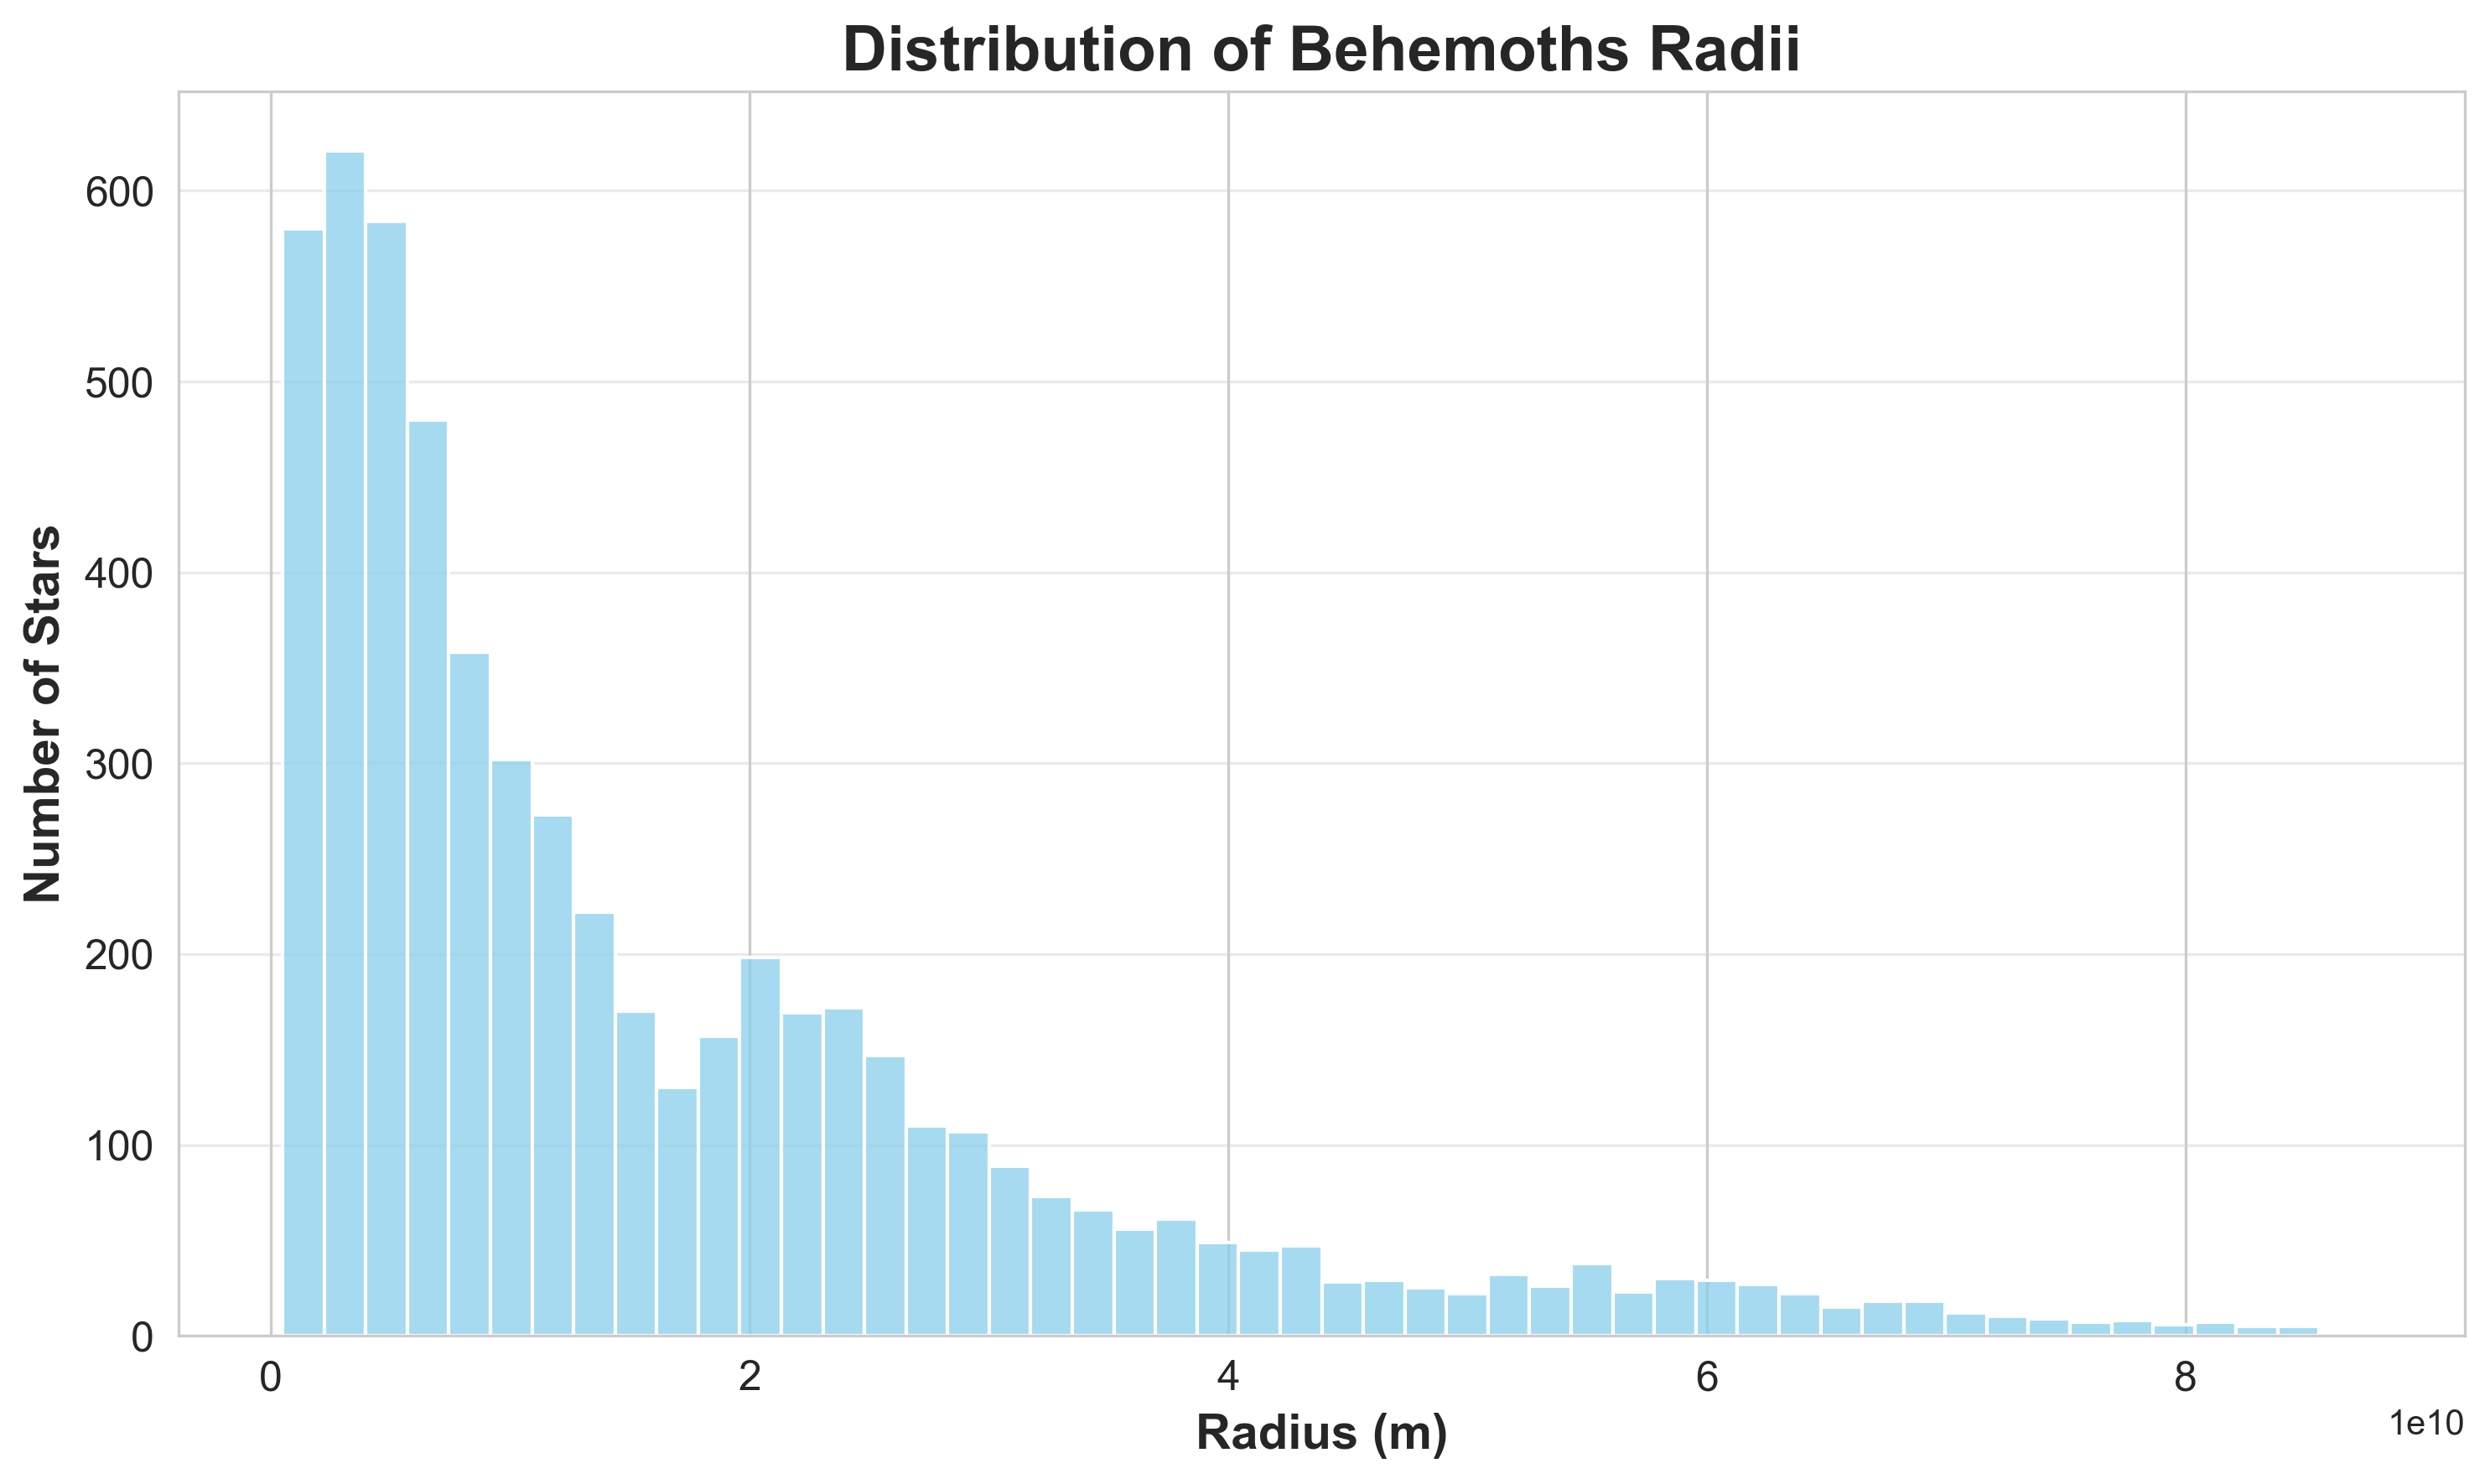

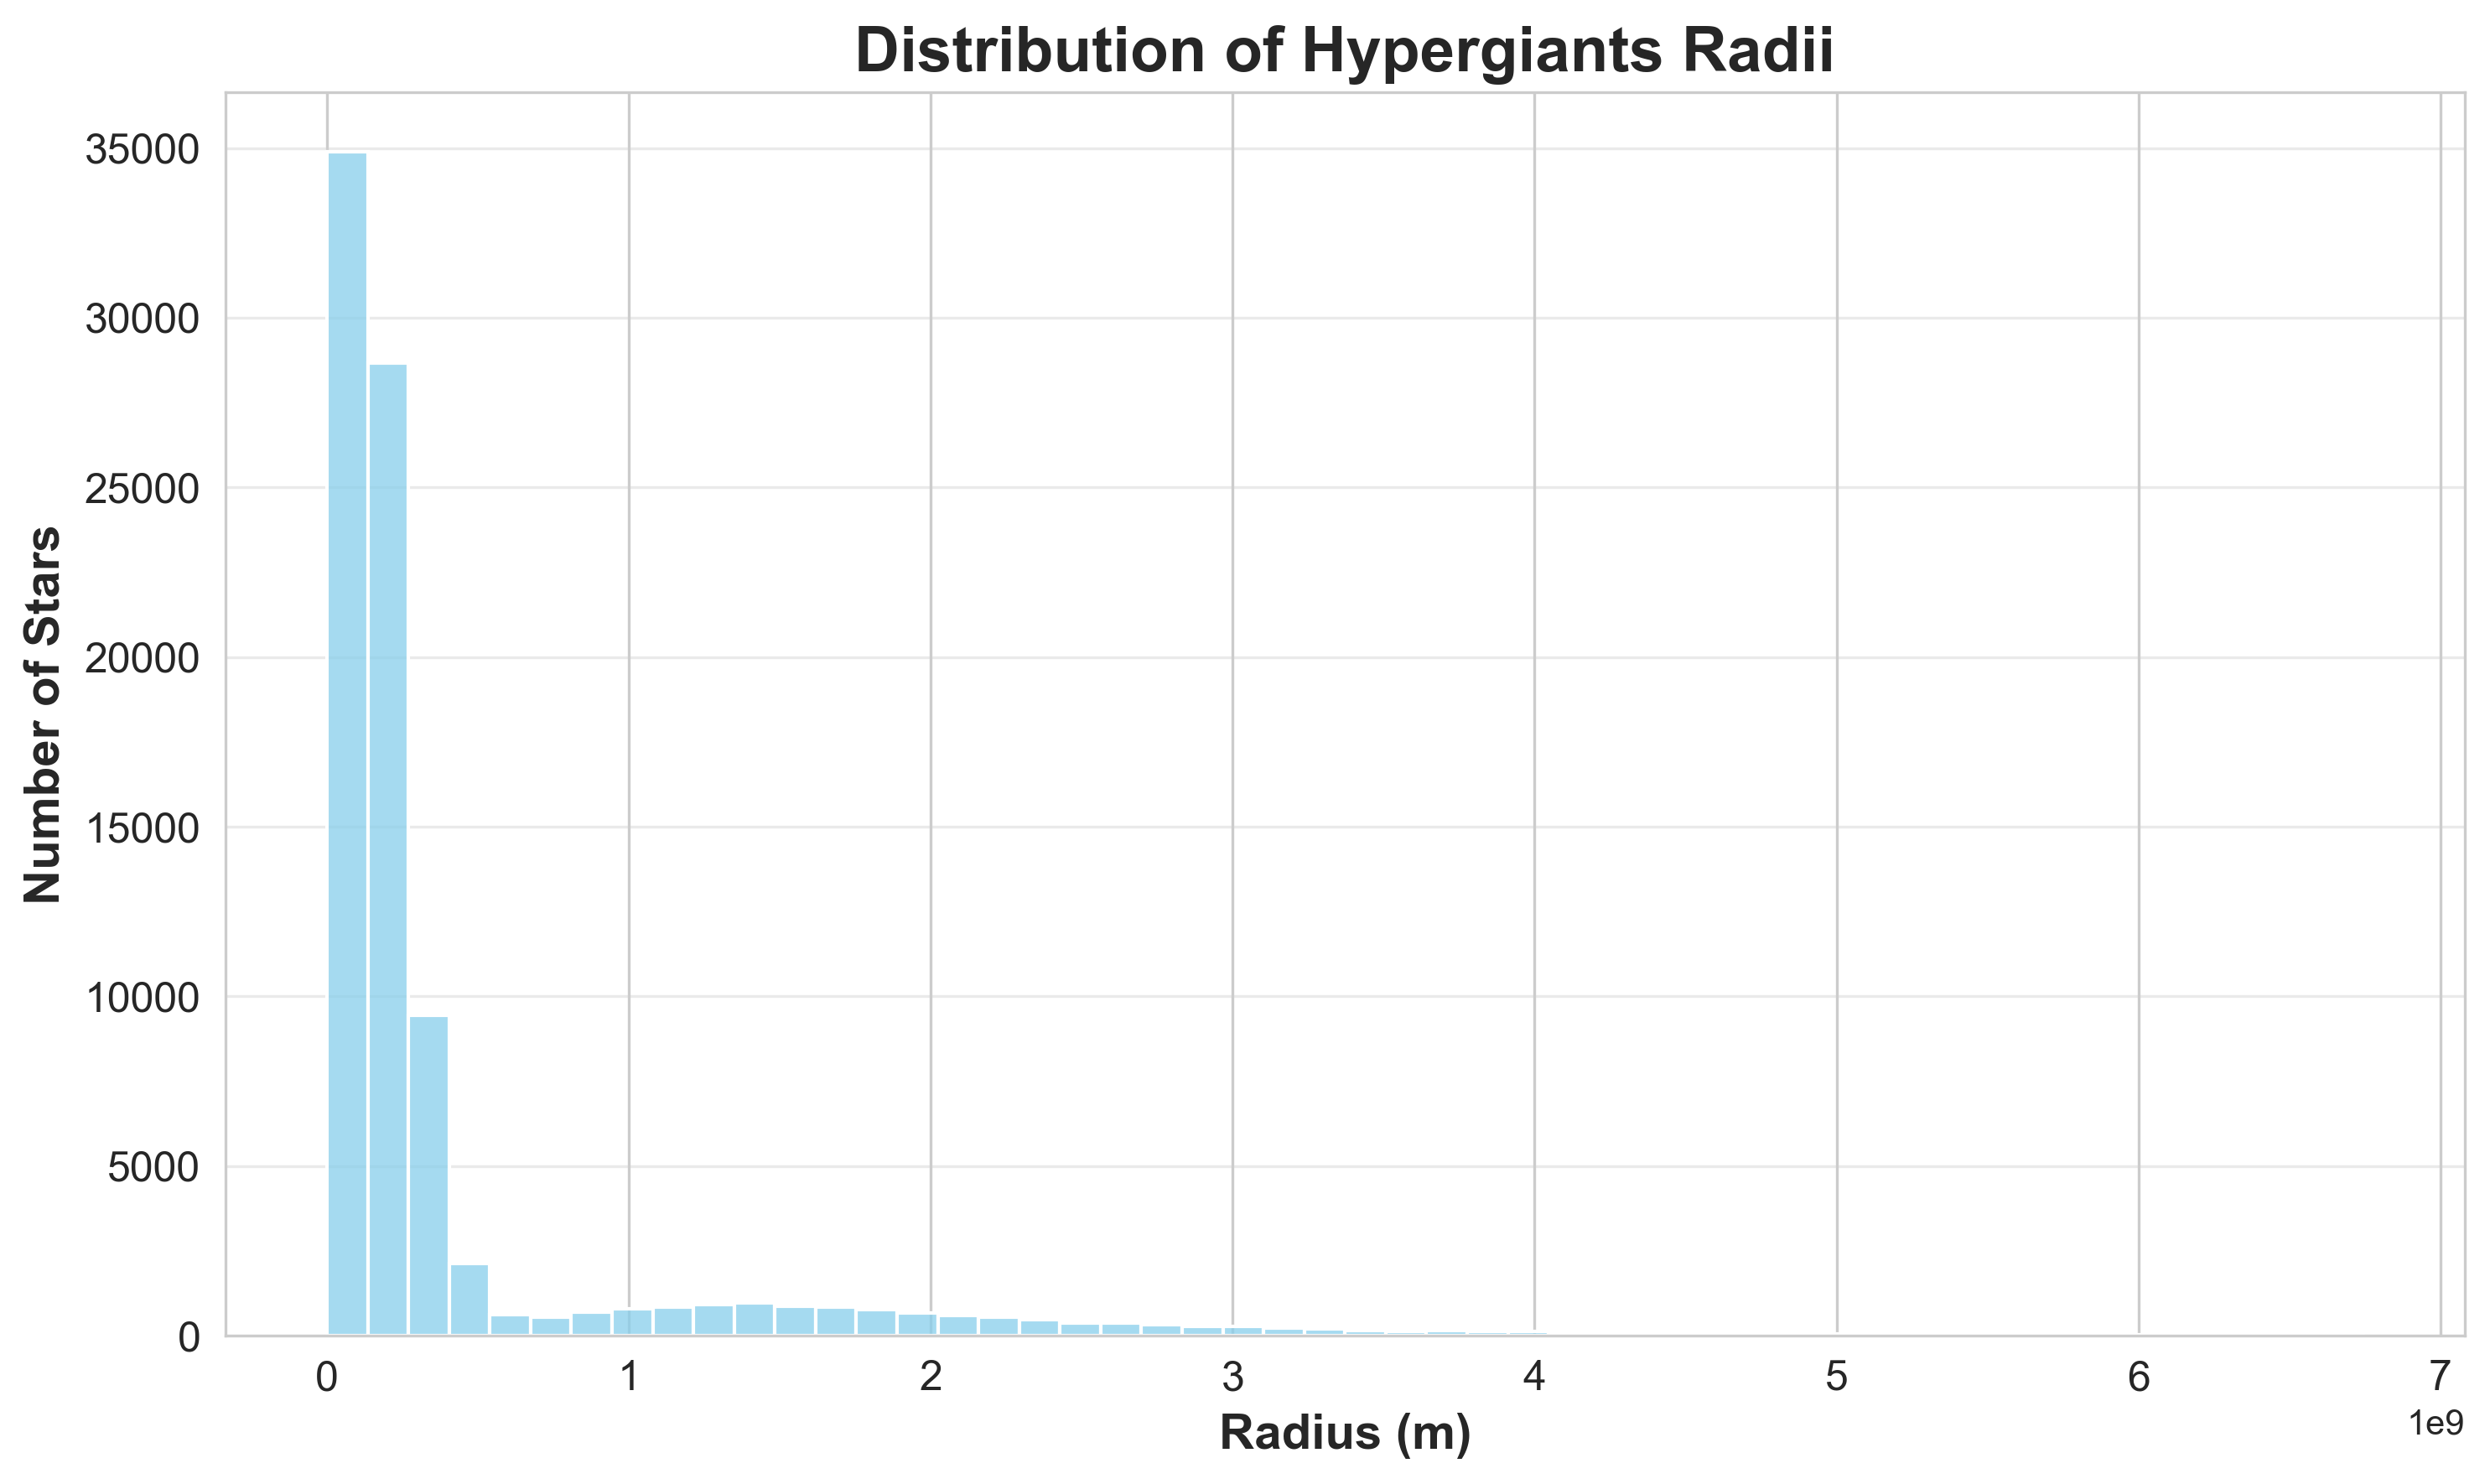

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the CSV file
star_data = pd.read_csv("/Users/kobibrown/Desktop/Distance_Ladder_Project/star_data_with_luminosity_radii_and_uncertainties.csv")

# Extract temperatures, luminosities, and radii
temperatures = star_data["Temperature"].values
luminosities = star_data["Luminosity"].values
radii = star_data["Radii"].values

# Define star class ranges
star_classes = {
    "Twinklers": {
        "temp_range": (10**4, 10**5),
        "luminosity_range": (10**21, 10**23),
    },
    "Celestials": {
        "temp_range": (10**3, 5*10**3),
        "luminosity_range": (10**24, 10**30),
    },
    "Behemoths": {
        "temp_range": (10**3, 10**5),
        "luminosity_range": (10**29, float('inf')),
    },
    "Hypergiants": {
        "temp_range": (10**3, 10**5),
        "luminosity_range": (10**21, 10**29),
    },
}

# Create a boolean mask for valid data (non-NaN values)
valid_data_mask = ~np.isnan(radii) & ~np.isnan(luminosities) & ~np.isnan(temperatures)

# Apply the boolean mask to the arrays
radii_no_nan = radii[valid_data_mask]
luminosities_no_nan = luminosities[valid_data_mask]
temperatures_no_nan = temperatures[valid_data_mask]

# Set number of standard deviations to filter outliers
num_std = 3

# Create radii frequency distribution plots for each star class
for star_class, star_ranges in star_classes.items():
    temp_min, temp_max = star_ranges["temp_range"]
    lum_min, lum_max = star_ranges["luminosity_range"]

    # Filter stars based on temperature and luminosity ranges
    class_mask = (
        (temperatures_no_nan >= temp_min) & (temperatures_no_nan <= temp_max)
        & (luminosities_no_nan >= lum_min) & (luminosities_no_nan <= lum_max)
    )

    # Filter radii for the current star class
    class_radii = radii_no_nan[class_mask]

    # Remove outliers
    class_radii = class_radii[np.abs(class_radii - np.mean(class_radii)) <= 3 * np.std(class_radii)]

    # Create a histogram of the filtered star radii
    plt.figure(figsize=(10, 6), dpi=300)
    sns.set_style("whitegrid")

    # Plot the histogram with 50 bins
    ax = sns.histplot(x=class_radii, bins=50, color="skyblue", kde=False)

    # Set title and axis labels
    ax.set_title(f"Distribution of {star_class} Radii", fontsize=18, fontweight="bold")
    ax.set_xlabel("Radius (m)", fontsize=14, fontweight="bold")
    ax.set_ylabel("Number of Stars", fontsize=14, fontweight="bold")

    # Set tick parameters
    ax.tick_params(axis="both", which="major", labelsize=12)

    # Add grid lines and legend
    ax.grid(axis="y", alpha=0.4)

    # Save and show the plot
    plt.tight_layout()
    plt.savefig(f"{star_class.lower().replace(' ', '_')}_radii.png")
    plt.show()